In [1]:
import sys
sys.path.append('../')
from utils import *
from fig10 import *
import json
import os
import shutil

### Read metadata file

In [2]:
f = open('Data/metadata.json')
metadata = json.load(f)

In [3]:
# view metadata present in the file
metadata

{'video_path': 'Data/video_overlay_with_sound.mp4',
 'vox_audio_path': 'Data/NIR_VK_Multani_Vox.wav',
 'mix_audio_path': 'Data/NIR_VK_Multani_StereoMix.wav',
 'vk_movement_path': 'Data/person1.csv',
 'vid_fps': 25,
 'video_offset': -278,
 'cycle_file': 'Data/NIR_VK_Multani_Metre_VilambitEktal.csv',
 'numDiv': 4,
 'start_time': 298,
 'duration': 20,
 'tonic': 138.59,
 'min_pitch': 103.83,
 'max_pitch': 415.3,
 'temp_folder': 'Temp/',
 'notes': [{'label': 'P_', 'cents': -500},
  {'label': 'd_', 'cents': -400},
  {'label': 'N_', 'cents': -200},
  {'label': 'S', 'cents': 0},
  {'label': 'r', 'cents': 100},
  {'label': 'g', 'cents': 300},
  {'label': 'm', 'cents': 600},
  {'label': 'P', 'cents': 700},
  {'label': 'd', 'cents': 800},
  {'label': 'N', 'cents': 1100},
  {'label': "S'", 'cents': 1200},
  {'label': "r'", 'cents': 1300},
  {'label': "g'", 'cents': 1500},
  {'label': "m'", 'cents': 1800},
  {'label': "P'", 'cents': 1900}]}

### Play the video being analysed

Create a 'temp' folder to save a shortened video to display in

In [4]:
os.makedirs(metadata['temp_folder'], exist_ok=True)

Save a shortened video in the Temp folder with the file name 'video_shortened.mp4'

In [5]:
playVideo(videoPath=metadata['video_path'], startTime=metadata['start_time'], duration=metadata['duration'], 
          destPath=os.path.join(metadata['temp_folder'], 'video_shortened.mp4'), videoOffset=metadata['video_offset'])

### Initialise and populate figure

In [6]:
%%capture
# initialise figure, with 3 subplots
fig, axs = generateFig(4, (21, 14), [2, 3, 3, 3])

In [7]:
# plot waveplot
axs[0] = drawWave(audioPath=metadata['mix_audio_path'], ax=axs[0], annotate=False, startTime=metadata['start_time'], duration=metadata['duration'])
# plot pitch track
axs[1] = pitchCountour(audioPath=metadata['vox_audio_path'], startTime=metadata['start_time'], duration=metadata['duration'], minPitch=metadata['min_pitch'], maxPitch=metadata['max_pitch'], notes=metadata['notes'], tonic=metadata['tonic'], ax=axs[1], yticks=True)
# plot intensity contour
axs[2] = intensityContour(audioPath=metadata['vox_audio_path'], startTime=metadata['start_time'], duration=metadata['duration'], minPitch=metadata['min_pitch'], ax=axs[2], annotate=False, cyclePath=metadata['cycle_file'], yticks=True)
# plot wrist position
axs[3] = plot_hand(annotationFile=metadata['vk_movement_path'], startTime=metadata['start_time'], duration=metadata['duration'], freqXLabels=5, vidFps=metadata['vid_fps'], ax=axs[3], cyclePath=metadata['cycle_file'], numDiv=metadata['numDiv'], cAnnot='purple', annotLabel=True, xticks=True, yticks=True, annotate=True, vidOffset=metadata['video_offset'])

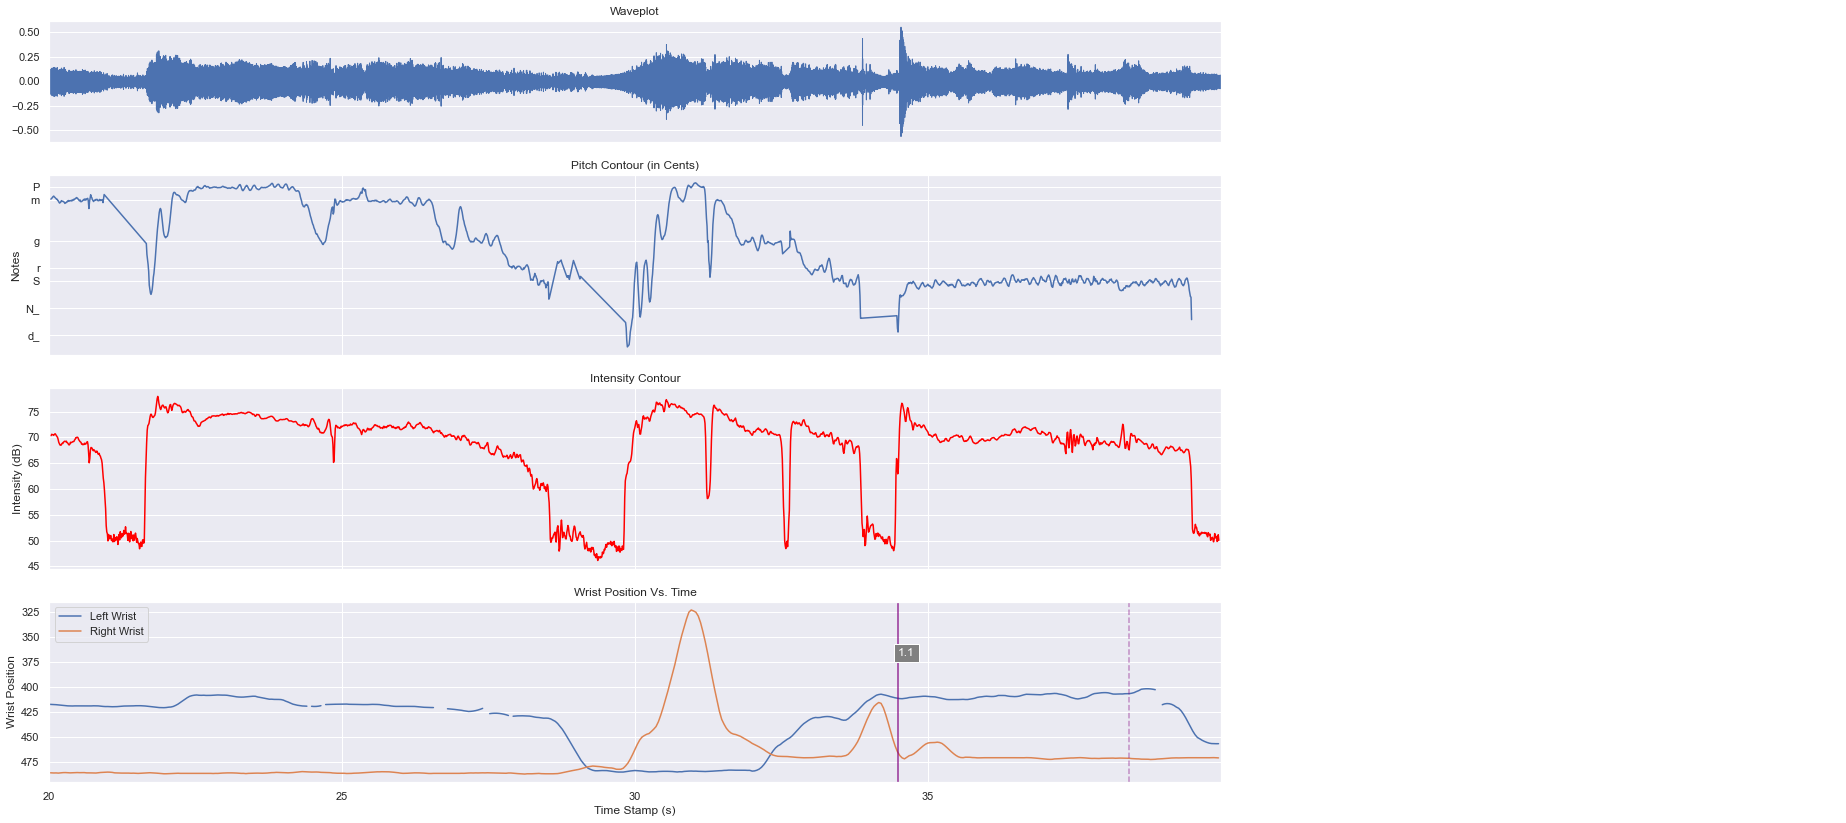

In [8]:
fig

Delete the temporary folder along with the contents that were created in it. The following line can be commented out if you wish to keep the temp folder.

In [9]:
shutil.rmtree(metadata['temp_folder'])